In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
!ls ../data

Customer.csv      Transactions.csv  prod_cat_info.csv


In [3]:
customer = pd.read_csv('../data/Customer.csv')
prod_cat_info = pd.read_csv('../data/prod_cat_info.csv')
transactions = pd.read_csv('../data/Transactions.csv')

In [64]:
customer.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [7]:
# Details for each unique customer
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [65]:
customer[(customer['Gender']).isna() | (customer['city_code']).isna()]

,customer_Id,DOB,Gender,city_code
24,267199,14-02-1970,NaN,2.0
87,271626,02-06-1970,NaN,6.0
115,268447,14-07-1970,M,NaN
149,268709,09-09-1970,F,NaN


In [73]:
# Drop row with missing data - only one entry for each customer
customer = customer[(customer['Gender'].notna()) & (customer['city_code'].notna())]
customer.reset_index(drop=True, inplace=True)

In [60]:
# Product category info
prod_cat_info.isnull().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [61]:
prod_cat_info

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [11]:
# TODO
# * What is Qty?
# * What is Rate?
# * What is total_amt?
# * Parse `tran_date`
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [74]:
transactions.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
calculated_amt      0
dtype: int64

In [35]:
transactions.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
calculated_amt      float64
dtype: object

In [13]:
transactions['Store_type'].unique()

array(['e-Shop', 'TeleShop', 'MBR', 'Flagship store'], dtype=object)

In [23]:
transactions.loc[:, 'Qty'] = transactions['Qty'].apply(lambda x: np.abs(x))
transactions.loc[:, 'Rate'] = transactions['Rate'].apply(lambda x: np.abs(x))
transactions.loc[:, 'total_amt'] = transactions['total_amt'].apply(lambda x: np.abs(x))

In [51]:
def calculate_amt(row):
    
    return round((row['Qty'] * row['Rate']) + row['Tax'],3)

transactions['calculated_amt'] =  transactions.apply(calculate_amt, axis=1)

In [52]:
# Can validate how `total_amt` is calculated
transactions[transactions['calculated_amt'] != transactions['total_amt']]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,calculated_amt


In [41]:
transactions[transactions['calculated_amt'] != transactions['total_amt']].iloc[0]

transaction_id      51750724947
cust_id                  273420
tran_date            24-02-2014
prod_subcat_code              6
prod_cat_code                 5
Qty                           2
Rate                        791
Tax                      166.11
total_amt               1748.11
Store_type             TeleShop
calculated_amt          1748.11
Name: 2, dtype: object

In [75]:
# Want to check for outliers wrt. `Qty`, `Rate`, and `Tax` (can ignore total_amt as this is derived from other variables)
transactions.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,calculated_amt
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,3.007331,787.048323,248.667192,2616.926160,2616.926160
std,2.898194e+10,2431.692059,3.726372,1.677016,1.420576,415.750367,187.177773,1969.823226,1969.823226
min,3.268991e+06,266783.000000,1.000000,1.000000,1.000000,70.000000,7.350000,77.350000,77.350000
25%,2.493864e+10,268935.000000,3.000000,2.000000,2.000000,426.000000,98.280000,1034.280000,1034.280000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,791.000000,199.080000,2095.080000,2095.080000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1150.000000,365.715000,3848.715000,3848.715000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,8287.500000


3.00733093306728
1.4205450548371437


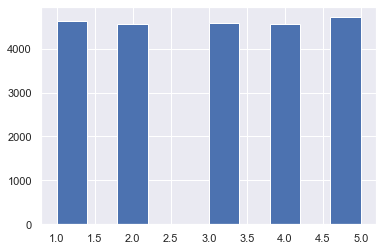

In [80]:
plt.hist(transactions['Qty'])
print(np.mean(transactions['Qty']))
print(np.std(transactions['Qty']))

787.048323428621
415.741349778617


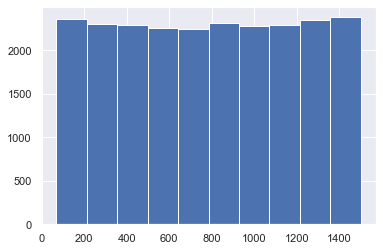

In [81]:
plt.hist(transactions['Rate'])
print(np.mean(transactions['Rate']))
print(np.std(transactions['Rate']))

248.66719168871728
187.17371280732746


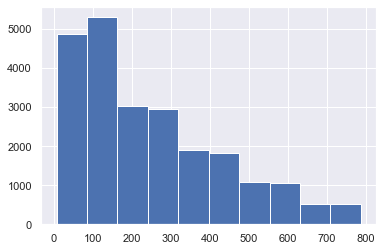

In [82]:
plt.hist(transactions['Tax'])
print(np.mean(transactions['Tax']))
print(np.std(transactions['Tax']))

(array([4879., 5292., 3023., 2944., 1912., 1821., 1080., 1058.,  523.,
         521.]),
 array([-1.28926861, -0.87246328, -0.45565796, -0.03885263,  0.37795269,
         0.79475801,  1.21156334,  1.62836866,  2.04517399,  2.46197931,
         2.87878463]),
 <a list of 10 Patch objects>)

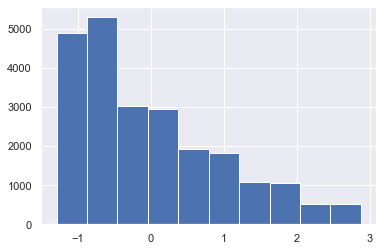

In [84]:
plt.hist((transactions['Tax'] - np.mean(transactions['Tax']))/np.std(transactions['Tax']))